# Load in Data
Loading data from dataworld

In [476]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
import seaborn as sns

In [477]:
appearances_df = pd.read_csv('https://query.data.world/s/uwuo6sxfqlzsbm6jhalo45win3eut4?dws=00000')
clubs_df = pd.read_csv('https://query.data.world/s/qaze23ezd5erez5yxybgepvhj3e3af?dws=00000')
club_games_df = pd.read_csv('https://query.data.world/s/cnbbhsthqv35pjvcnq2ial47jsgxkh?dws=00000')
competitions_df = pd.read_csv('https://query.data.world/s/o6waa35f7hgvesipsqhh2ir7ymav3y?dws=00000')
games_df = pd.read_csv('https://query.data.world/s/l4j3ct5jctslxloghv5plnmgnn3xww?dws=00000')
game_events_df = pd.read_csv('https://query.data.world/s/np7xbqq6hjfxaeoei3n2tc5orqliia?dws=00000')
players_df = pd.read_csv('https://query.data.world/s/gtwcwmx2rpe42p4a3upe4zh2yvaj2m?dws=00000')
player_valuations_df = pd.read_csv('https://query.data.world/s/mlqges6k3mpachaluntpm6gbxnj37o?dws=00000')

In [478]:
dataframes = []
dataframes.append(appearances_df)
dataframes.append(clubs_df)
dataframes.append(club_games_df)
dataframes.append(club_games_df)
dataframes.append(competitions_df)
dataframes.append(games_df)
dataframes.append(game_events_df)
dataframes.append(players_df)
dataframes.append(player_valuations_df)

# Data Processing
Referenced DavidCoxon's kaggle notebook for this step: https://www.kaggle.com/code/davidcoxon/football-transfer-market-eda-basic-modelling/notebook#Process-Data

In [479]:
#calculate the age of players
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])

#drop players without date of birth
players_df = players_df[players_df['date_of_birth'].isnull() == False]

today = datetime.now()

players_df['age'] = (today - players_df['date_of_birth']).apply(lambda x: x.days) / 365.25

players_df['age'] = players_df['age'].round().astype(int)



C:\Users\Tarun\AppData\Local\Temp\ipykernel_23516\611273569.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df['age'] = (today - players_df['date_of_birth']).apply(lambda x: x.days) / 365.25
C:\Users\Tarun\AppData\Local\Temp\ipykernel_23516\611273569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df['age'] = players_df['age'].round().astype(int)


In [480]:
#Calculate remaining contract value of each player
players_df['contract_expiration_date'] = pd.to_datetime(players_df['contract_expiration_date'])

#get rid of players with no expiration rdate
players_df = players_df[players_df['contract_expiration_date'].isnull() == False]

players_df['term_days_remaining'] = (players_df['contract_expiration_date'] - today).apply(lambda x: x.days)

C:\Users\Tarun\AppData\Local\Temp\ipykernel_23516\2358661032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df['contract_expiration_date'] = pd.to_datetime(players_df['contract_expiration_date'])


In [481]:
# add year to player valuations
player_valuations_df['datetime']=pd.to_datetime(player_valuations_df['datetime'])
player_valuations_df['year']=player_valuations_df['datetime'].dt.year



In [482]:
#add yar to player appearances
appearances_df['datetime'] = pd.to_datetime(appearances['date'], format = "%Y-%m-%d")
appearances_df['year'] = appearances_df['datetime'].dt.year

In [483]:
#add position to player valuations
position_df=players_df.copy()
position_df=position_df.drop(['name', 'current_club_id', 'current_club_name', 'country_of_citizenship', 'country_of_birth', 
                              'city_of_birth', 'date_of_birth', 'foot', 'height_in_cm', 'market_value_in_eur', 
                              'highest_market_value_in_eur', 'agent_name', 'contract_expiration_date', 'current_club_domestic_competition_id', 
                              'first_name', 'last_name', 'player_code', 'image_url', 'last_season', 'url', 'age'], axis=1)

player_valuations_df = player_valuations_df.merge(
position_df, left_on = 'player_id', right_on = 'player_id')

In [484]:
#add position to appearances
#add position to appearances
value_df=players_df.copy()
value_df=value_df.drop(['name', 'current_club_id', 'current_club_name', 'country_of_citizenship', 'country_of_birth',
                        'city_of_birth', 'date_of_birth', 'foot', 'height_in_cm', 'sub_position',
                        'highest_market_value_in_eur', 'agent_name', 'contract_expiration_date', 
                        'current_club_domestic_competition_id', 'first_name', 'last_name', 'player_code', 
                        'image_url', 'last_season', 'url', 'age'], axis=1)
appearances_df1=value_df.merge(appearances_df, left_on='player_id', right_on='player_id')

## Player Valuations Over Time

In [485]:
#filtering range
player_valuations_df = player_valuations_df[(player_valuations_df.year > 2004) & (player_valuations_df.year < 2023)]

high_value_player_valuations_df = player_valuations_df[(player_valuations_df.market_value_in_eur > 40000000)]
positions=players_df.position.unique()


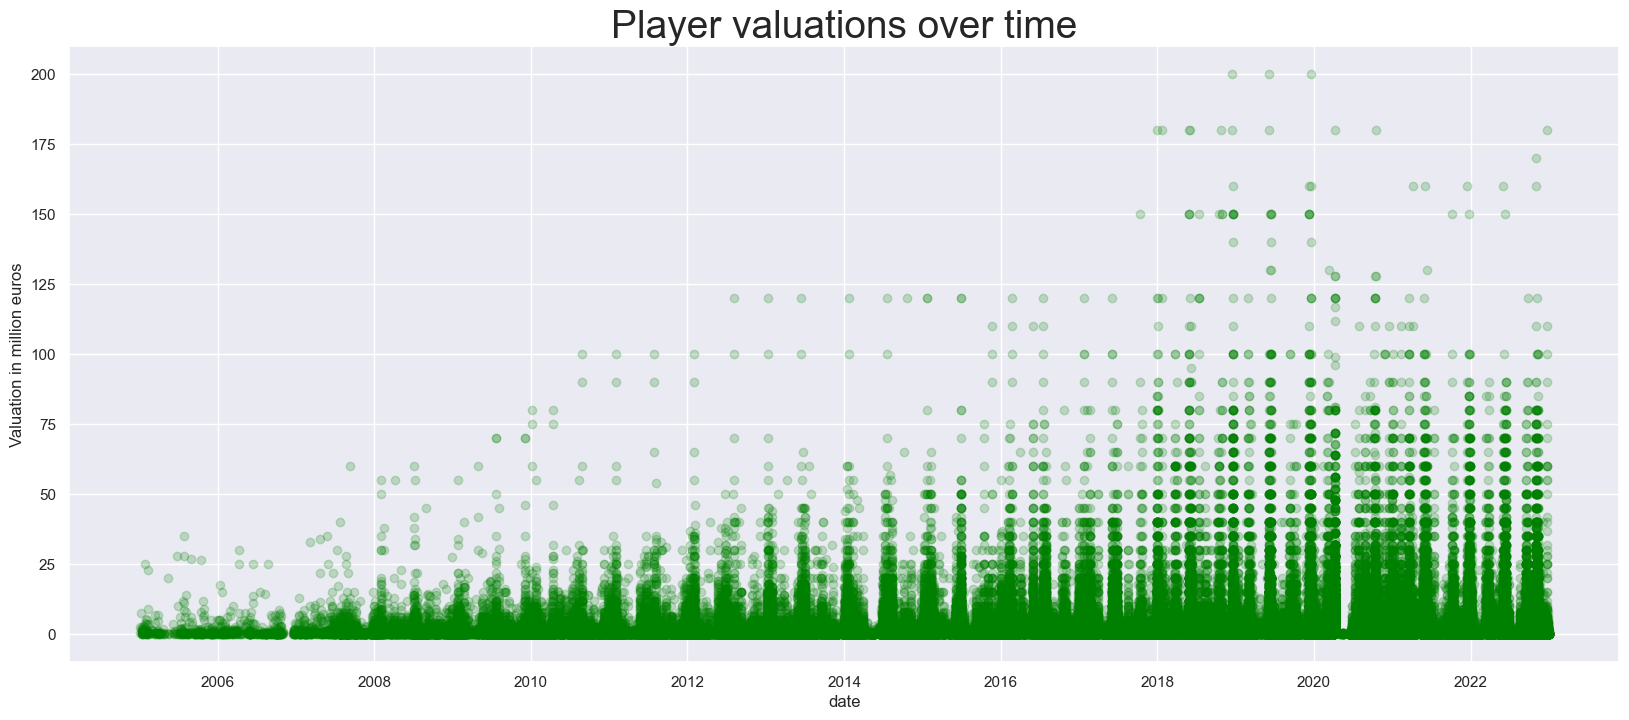

In [486]:
# Visualize of valuation data over time
plt.figure(figsize=(20,8))
plt.scatter(player_valuations_df['datetime'],y=player_valuations_df['market_value_in_eur']/1000000, c='green',alpha=0.20)
plt.xlabel('date');plt.ylabel('Valuation in million euros')
plt.title('Player valuations over time',fontsize=28)
plt.show()

## Valuation Data Over Time

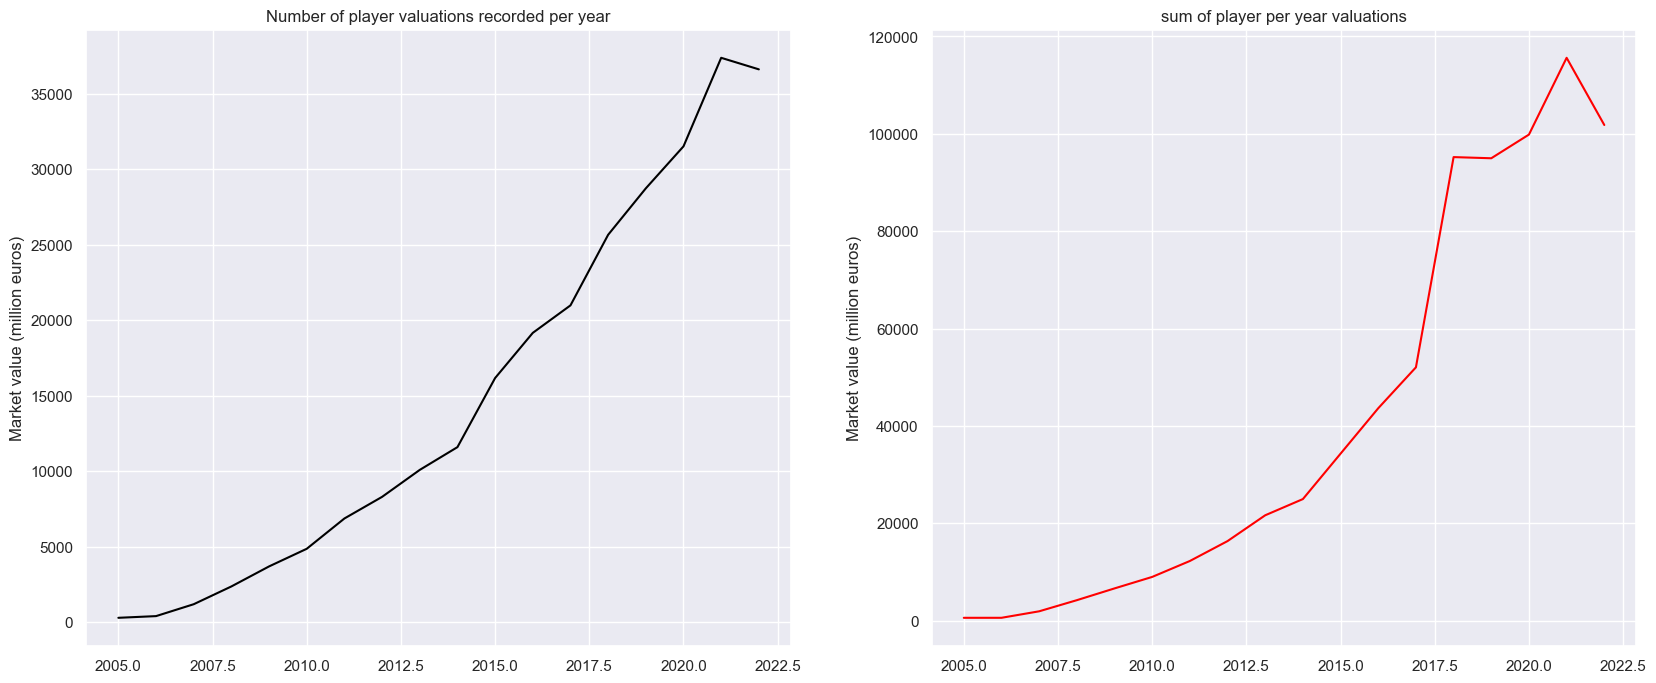

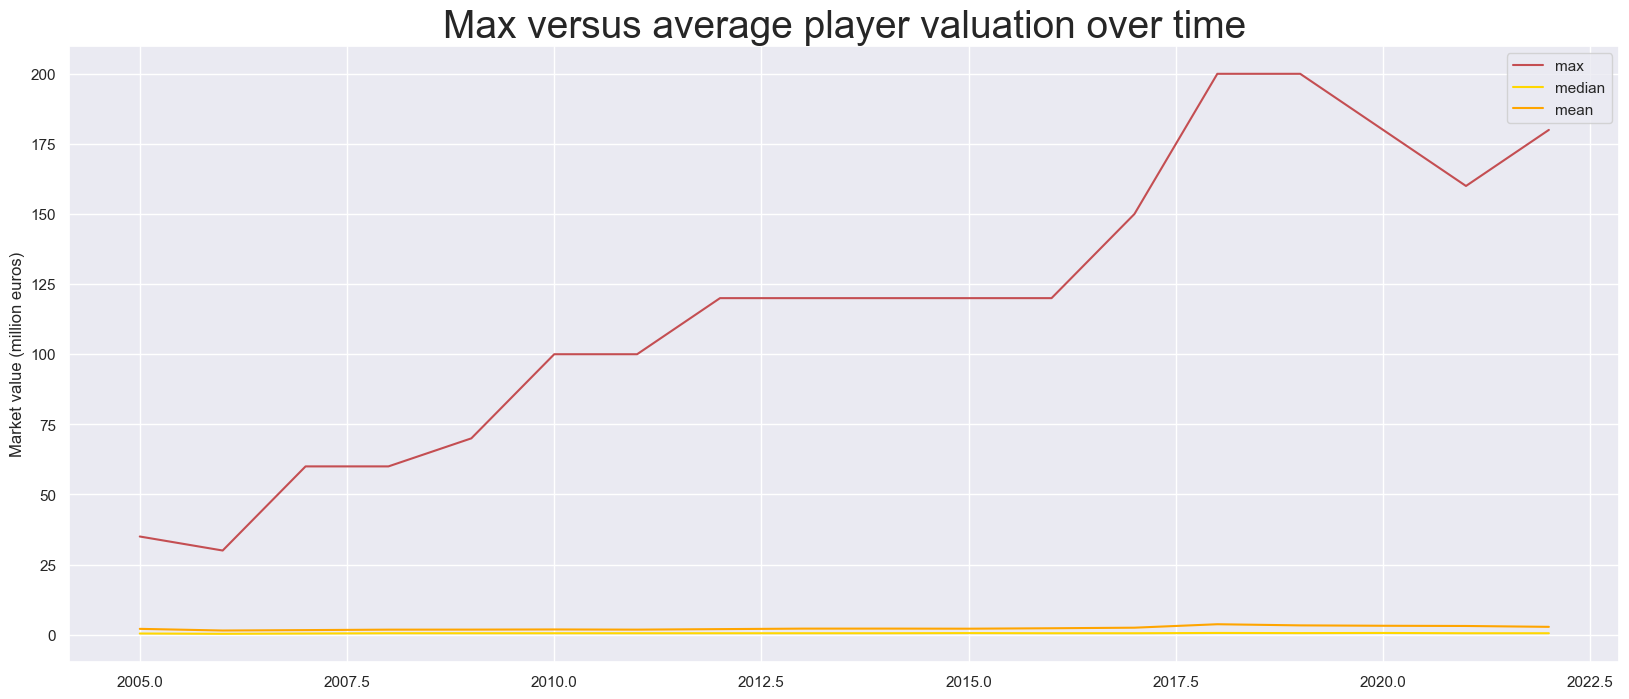

In [487]:
#Visualize of valuation data over time
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
yeargroups1 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).count() \
    .sort_values(by='year', ascending=True)
yeargroups2 = player_valuations_df.loc[:,['market_value_in_eur', 'year']] .groupby(['year']).sum() \
    .sort_values(by='year', ascending=True)
yeargroups3 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).max() \
    .sort_values(by='year', ascending=True)
yeargroups4 = player_valuations_df.loc[:,['market_value_in_eur', 'year']] .groupby(['year']).min() \
    .sort_values(by='year', ascending=True)
yeargroups5 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).median() \
    .sort_values(by='year', ascending=True)
yeargroups6 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).mean() \
    .sort_values(by='year', ascending=True)

plt.subplot(1, 2, 1)                 
plt.title('Number of player valuations recorded per year')
plt.plot(yeargroups1.index,yeargroups1,color='black')
plt.ylabel('Market value (million euros)')
plt.subplot(1, 2, 2)
plt.title('sum of player per year valuations')
plt.plot(yeargroups2.index,yeargroups2/1000000,color='red')
plt.ylabel('Market value (million euros)')
plt.show()
plt.figure(figsize=(20,8))
plt.title('Max versus average player valuation over time',fontsize=28)
plt.plot(yeargroups3.index,yeargroups3/1000000,color='r',label='max')
plt.plot(yeargroups5.index,yeargroups5/1000000,color='Gold',label='median')
plt.plot(yeargroups6.index,yeargroups6/1000000,color='Orange',label='mean')
plt.ylabel('Market value (million euros)')
plt.legend()
plt.show()

## Valuation per Position Over Time

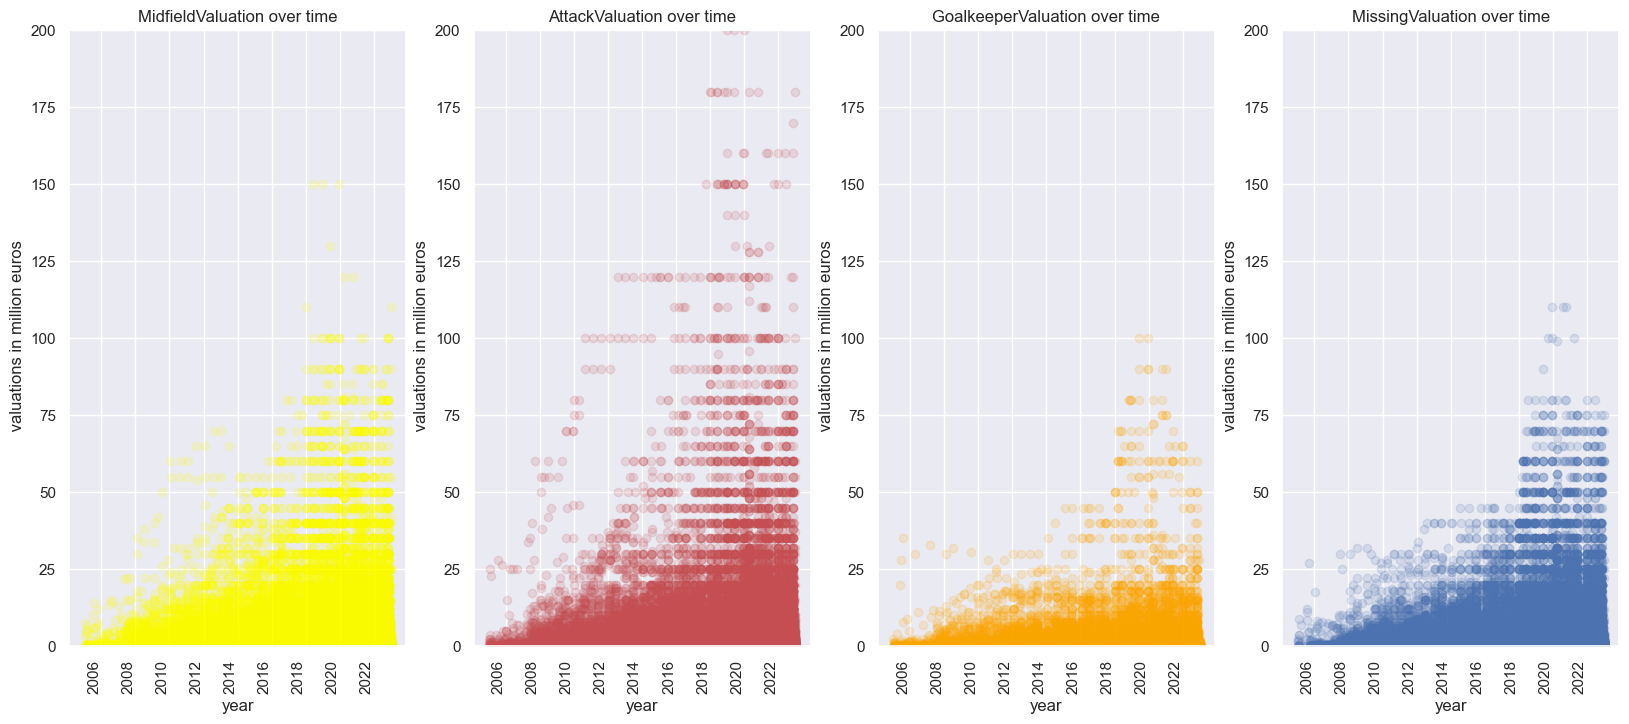

In [488]:
# valuation by position
plt.figure(figsize=(20,8))
n=1;colour=['yellow','r','orange','b','g']
for position in positions:
    plt.subplot(1,4,n)
    player_valuations_df1 = player_valuations_df[(player_valuations_df.position==position)]                                             
    plt.scatter(player_valuations_df1['datetime'],y=player_valuations_df1['market_value_in_eur']/1000000, c=colour[n-1],alpha=0.15)
    plt.xlabel('year')
    plt.ylabel(' valuations in million euros')
    plt.title(position+'Valuation over time')
    plt.ylim(0,200)
    plt.xticks(rotation=90, ha='right')
    if(n <= 3):
        n+=1
plt.show()  

## Player Data Visualization

In [489]:
#get rid of 0 market value players
players_df1 = players_df[players_df.highest_market_value_in_eur.isnull() == False]

#sort by market value
players_df1 = players_df1.sort_values("highest_market_value_in_eur", ascending = False)

#Filter by season and value
players_df1 = players_df[players_df["last_season"] >= 2019]
players_df1 = players_df1[players_df1['highest_market_value_in_eur'] >= 10000000 ]

high_value_players_df = players_df1[(players_df1.market_value_in_eur > 40000000 )]
positions=players_df.position.unique()

Text(0, 0.5, 'number of players')

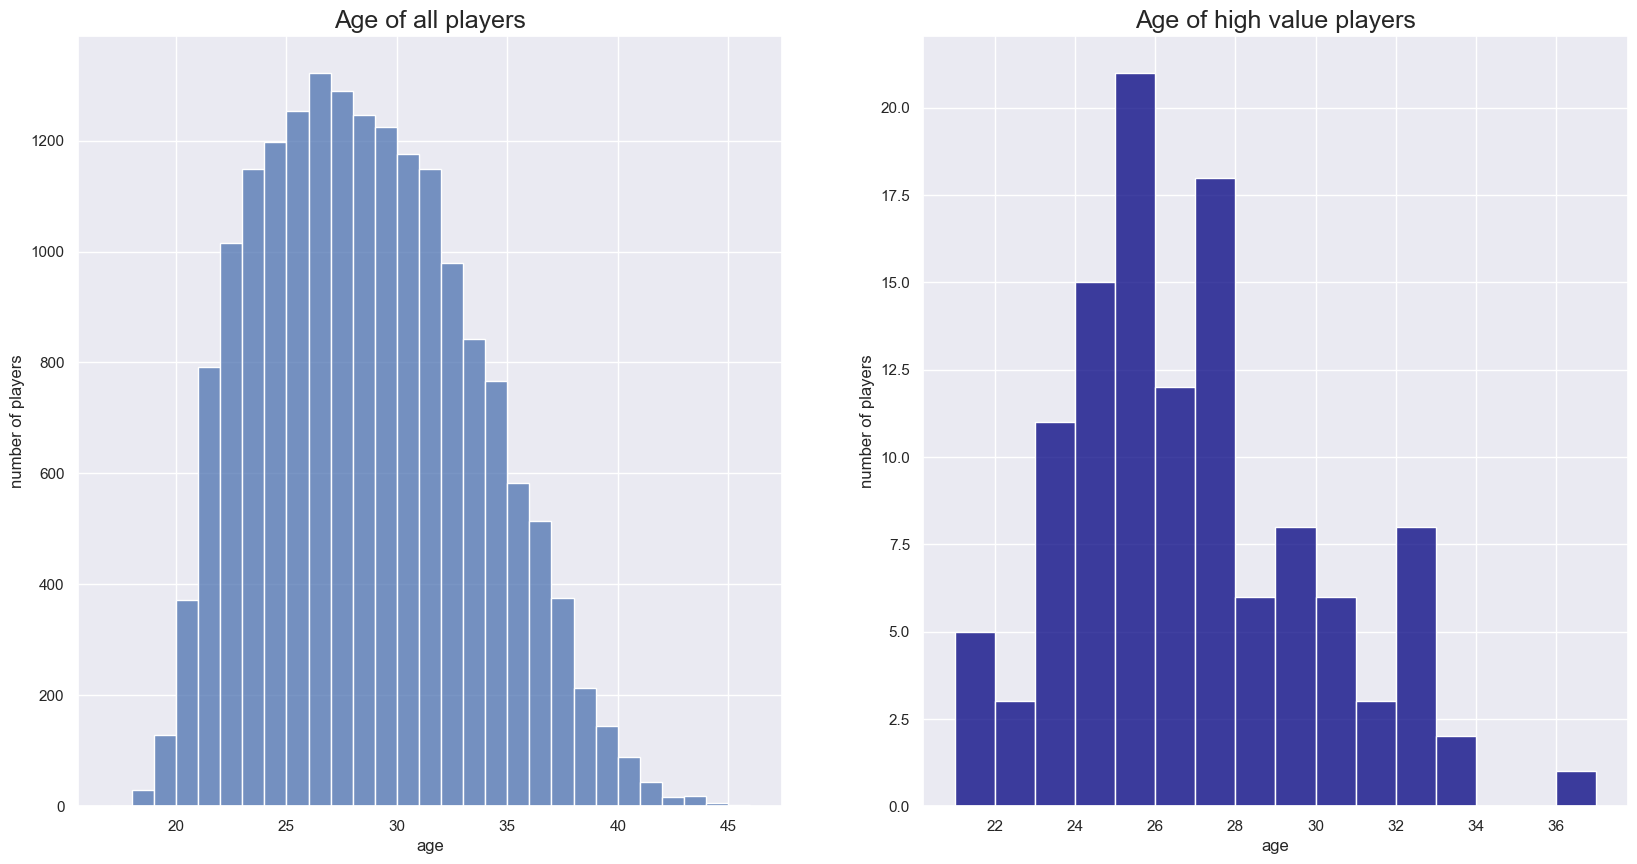

In [490]:
# Show player age distribution
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x='age',data=players_df, binwidth=1,color='b')
plt.title("Age of all players",fontsize=18)
plt.xlabel('age'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='age',data=high_value_players_df, binwidth=1,color='navy')
plt.title("Age of high value players",fontsize=18)
plt.xlabel('age'); plt.ylabel('number of players')

Text(0, 0.5, 'number of players')

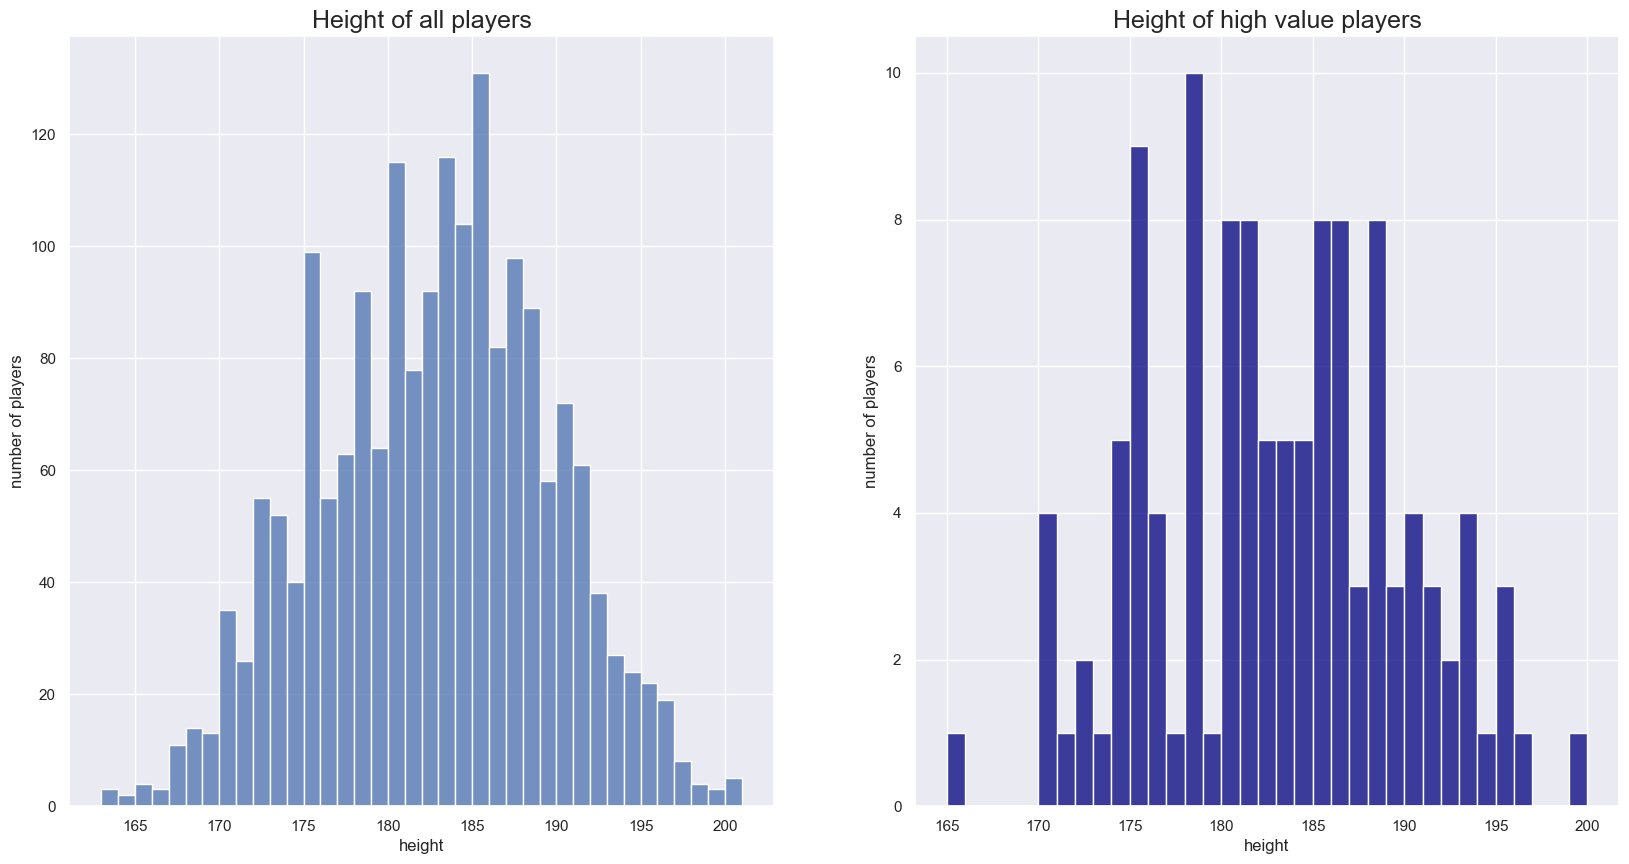

In [491]:
# Show player height distribution
players_df3 = players_df1[players_df1.height_in_cm.isnull() == False]
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x='height_in_cm',data=players_df3, binwidth=1,color='b')
plt.title("Height of all players",fontsize=18)
plt.xlabel('height'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='height_in_cm',data=high_value_players_df, binwidth=1,color='navy')
plt.title("Height of high value players",fontsize=18)
plt.xlabel('height'); plt.ylabel('number of players')


Text(0, 0.5, 'number of players')

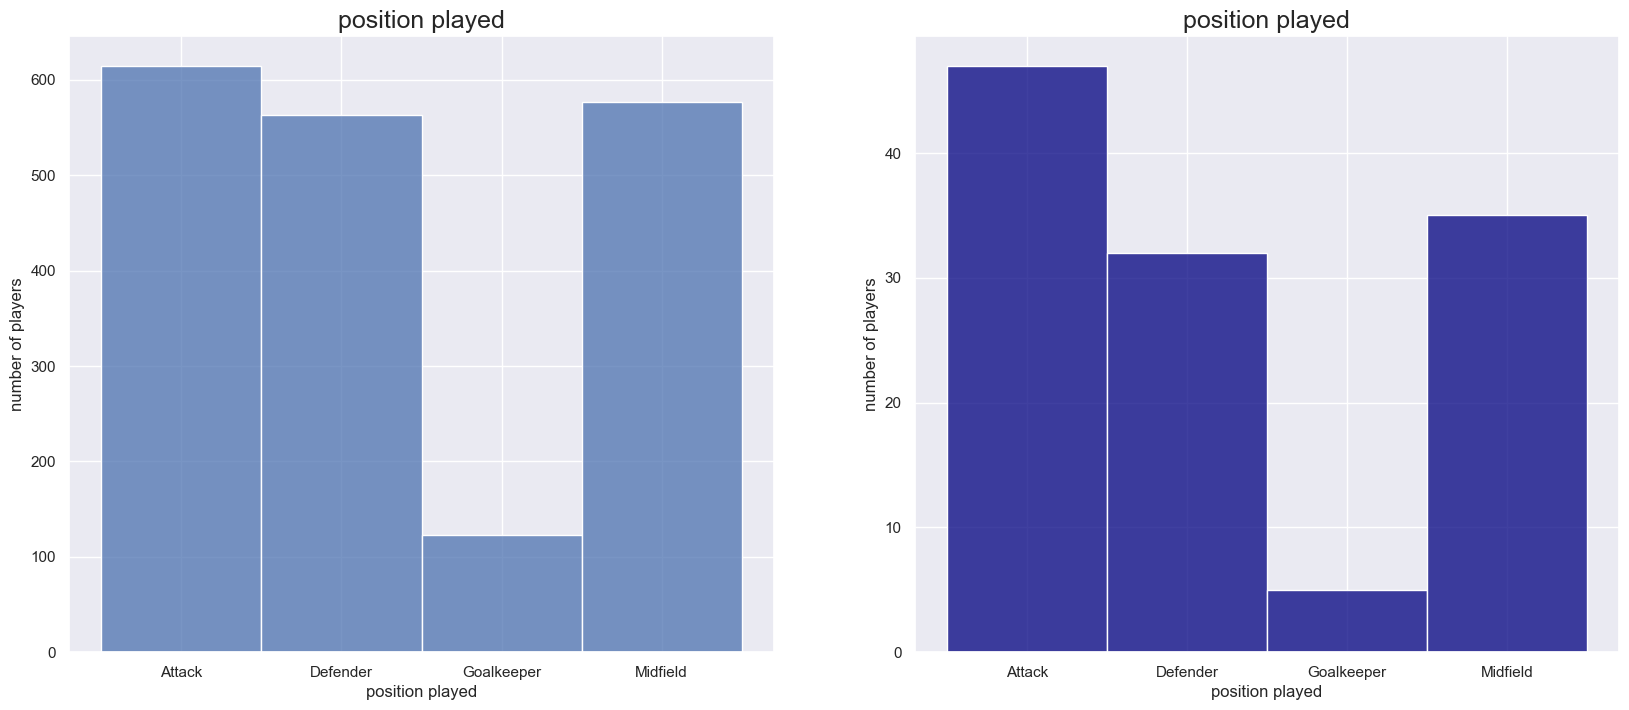

In [492]:
# Show position data
players_df1 = players_df1.sort_values("position", ascending = True)
high_value_players_df1 = high_value_players_df.sort_values("position", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
plt.title("position played",fontsize=18);plt.grid(True)
sns.histplot(x='position',data=players_df1, binwidth=1,color='b')
plt.xlabel('position played'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='position',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("position played",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')

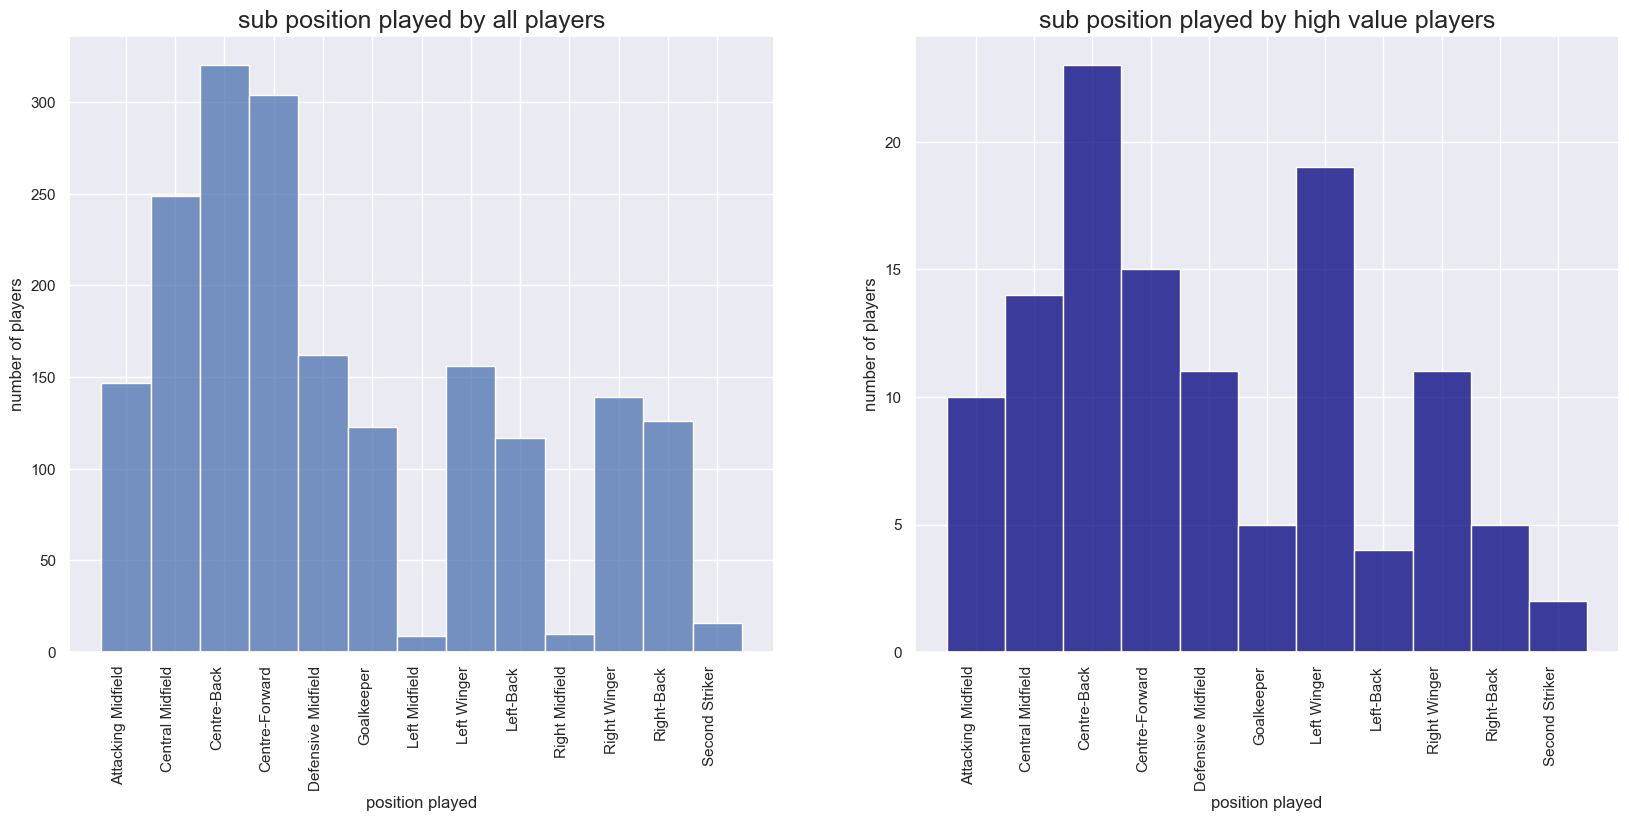

In [493]:
# Show subposition data
players_df1 = players_df1.sort_values("sub_position", ascending = True)
high_value_players_df1 = high_value_players_df.sort_values("sub_position", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.histplot(x='sub_position',data=players_df1, binwidth=1,color='b')
plt.title("sub position played by all players",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
plt.xticks(rotation=90, ha='right');
plt.subplot(1, 2, 2)
sns.histplot(x='sub_position',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("sub position played by high value players",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
plt.xticks(rotation=90, ha='right');

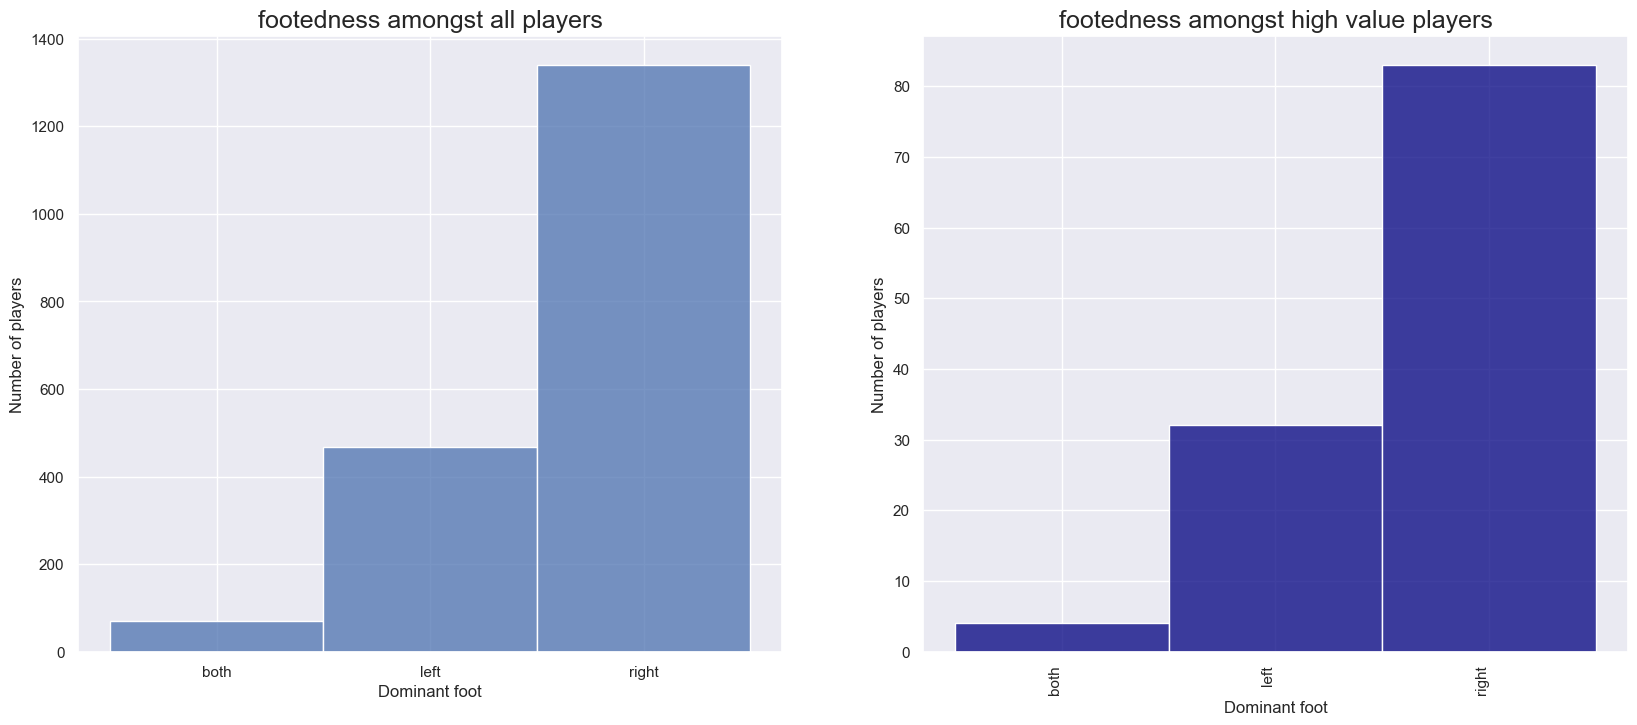

In [494]:
# Show  footedness data
players_df1 = players_df1.sort_values("foot", ascending = True)
high_value_players_df1 = high_value_players_df1.sort_values("foot", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.histplot(x='foot',data=players_df1, binwidth=1,color='b')
plt.title("footedness amongst all players",fontsize=18);plt.grid(True)
plt.xlabel('Dominant foot'); plt.ylabel('Number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='foot',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("footedness amongst high value players",fontsize=18);plt.grid(True)
plt.xlabel('Dominant foot'); plt.ylabel('Number of players')
plt.xticks(rotation=90, ha='right');

In [495]:
#filter appearances
appearances_df = appearances_df[(appearances_df.year > 2004) & (appearances_df.year < 2023)]

## Game Visualizations

In [496]:
#add year to game valuations
games_df['datetime'] = pd.to_datetime(games_df['date'], format = "%Y-%m-%d")
games_df['year'] = games_df['datetime'].dt.year

In [497]:
games_df = games_df[(games_df.year > 2004 ) & (games_df.year < 2023 )]

In [498]:
high_value_players_df2=high_value_players_df1.sort_values('market_value_in_eur',ascending = False)
highest_value_players_df2=high_value_players_df1.sort_values('highest_market_value_in_eur',ascending = False)

print((high_value_players_df2[['name',"market_value_in_eur"]]).head(15));print("*****")
print(highest_value_players_df2[['name',"highest_market_value_in_eur"]].head(15));print("*****")

                        name  market_value_in_eur
16630          Kylian Mbappé          180000000.0
23655         Erling Haaland          170000000.0
27049        Vinicius Junior          120000000.0
28441        Jude Bellingham          120000000.0
13965            Bukayo Saka          110000000.0
22329          Jamal Musiala          110000000.0
22115             Phil Foden          110000000.0
16684      Federico Valverde          100000000.0
24189                  Pedri          100000000.0
7978          Victor Osimhen          100000000.0
27126    Aurélien Tchouaméni           90000000.0
5961              Harry Kane           90000000.0
2013   Khvicha Kvaratskhelia           85000000.0
16971          Florian Wirtz           85000000.0
13541         Enzo Fernández           85000000.0
*****
                         name  highest_market_value_in_eur
16630           Kylian Mbappé                  200000000.0
24386            Lionel Messi                  180000000.0
10631            

## Combine Player Data

In [499]:
merged_players_df=players_df.drop(['current_club_id', 'city_of_birth', 'date_of_birth','first_name',
                                   'last_name', 'player_code', 'image_url', 'url'], axis=1)

In [500]:
#next look at clubs_df
merged_players_df = merged_players_df.reindex(columns = merged_players_df.columns.tolist() + 
                                              ['club_value','squad_size','goals','goals_2023','games_2023',
                                               'assists_2023','minutes_played_2023','goals_against_2023',
                                               'goals_for_2023','clean_sheet_2023'])


In [501]:
for player_id in merged_players_df.player_id.unique():
    club_id = players_df.current_club_id[players_df.player_id == player_id].iloc[0]
    club_value = clubs_df.total_market_value[clubs_df.club_id == club_id].iloc[0]
    squad_size = clubs_df.squad_size[clubs_df.club_id == club_id].iloc[0]
    
    try:
        merged_players_df.loc[merged_players_df.player_id == player_id, 'club_value'] = int(club_value)
    except:
        merged_players_df.loc[merged_players_df.player_id == player_id, 'club_value'] = 'NaN'
    
    merged_players_df.loc[merged_players_df.player_id == player_id, 'squad_size'] = int(squad_size)
    


In [502]:
#sort column order
columns=['player_id','games_2023','minutes_played_2023','goals_2023','assists_2023',
         'goals_against_2023','goals_for_2023','clean_sheet_2023','name','position',
         'sub_position','last_season','foot','height_in_cm','age','country_of_citizenship',
         'country_of_birth','current_club_name','club_value','squad_size',
         'current_club_domestic_competition_id','agent_name','contract_expiration_date',
         'term_days_remaining','market_value_in_eur','highest_market_value_in_eur']
merged_players_df=merged_players_df[columns]

In [503]:
#merge games and appearances
games_and_appearances_df = appearances_df.merge(games_df, on=['game_id'], how='left')

In [504]:
season = 2023

In [505]:
#create a function to collate player stats
def player_stats(player_id, season, df):
    df = games_and_appearances_df[games_and_appearances_df['player_id'] == player_id]
    df =  df[ df['season'] == season]    
    if (df.shape[0] == 0):
        Out = [(np.nan, season,0,0,0,0,0,0,0,0,0)]
        out_df = pd.DataFrame(data = Out, columns = ['player_id','season','goals','games',
                                                     'assists','minutes_played','goals_for','goals_against',
                                                     'clean_sheet','yellow_cards','red_cards'])
        return out_df    
    else:       
        df["goals_for"] = df.apply(lambda row: row['home_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['away_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df["goals_against"] = df.apply(lambda row: row['away_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['home_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df['clean_sheet'] = df.apply(lambda row: 1 if row['goals_against'] == 0
            else 0 if row['goals_against'] > 0
            else np.nan, axis=1)
        df = df.groupby(['player_id',"season"],as_index=False).agg({'goals': 'sum', 'game_id': 'nunique', 
                                                                      'assists': 'sum', 'minutes_played' : 'sum', 
                                                                    'goals_for' : 'sum',
                                                                      'goals_against' : 'sum', 'clean_sheet' : 
                                                                    'sum','yellow_cards':'sum','red_cards':'sum'})
        out_df = df.rename(columns={'game_id': 'games'})
        return out_df
#print(player_stats(67064, 2014, games_and_appearances_df)) #test function works.



In [506]:
#iterate through players
for index in merged_players_df.index:
    id = merged_players_df.loc[index][0]
    #print(id)
    name = merged_players_df.loc[index][1]
    stats = player_stats(id, season, games_and_appearances_df)
    try:
        merged_players_df.at[index,'games_{}'.format(season)]= stats['games'][0]
        merged_players_df.at[index,'goals_{}'.format(season)]= stats['goals'][0]
        merged_players_df.at[index,'assists_{}'.format(season)]= stats['assists'][0]
        merged_players_df.at[index,'minutes_played_{}'.format(season)]= stats['minutes_played'][0]
        merged_players_df.at[index,'goals_for_{}'.format(season)]= stats['goals_for'][0]
        merged_players_df.at[index,'goals_against_{}'.format(season)]= stats['goals_against'][0]
        merged_players_df.at[index,'clean_sheet_{}'.format(season)]= stats['clean_sheet'][0]
        merged_players_df.at[index,'yellow_cards_{}'.format(season)]= stats['yellow_cards'][0]
        merged_players_df.at[index,'red_cards_{}'.format(season)]= stats['red_cards'][0]
    except:
        #print(id)
        n=n+1     
print('appearance,goal and card data merged')
print(merged_players_df.info());#print(merged_players_df.describe())

appearance,goal and card data merged
<class 'pandas.core.frame.DataFrame'>
Index: 17938 entries, 21 to 28458
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             17938 non-null  int64         
 1   games_2023                            17938 non-null  float64       
 2   minutes_played_2023                   17938 non-null  float64       
 3   goals_2023                            17938 non-null  float64       
 4   assists_2023                          17938 non-null  float64       
 5   goals_against_2023                    17938 non-null  float64       
 6   goals_for_2023                        17938 non-null  float64       
 7   clean_sheet_2023                      17938 non-null  float64       
 8   name                                  17938 non-null  object        
 9   position                              1

## Narrow down Dataset to Big 5

In [507]:
#get rid of players who have negative term_days_remaining
merged_players_df = merged_players_df[merged_players_df.term_days_remaining >= 0]

In [508]:
#check what the big 5 leagues are

In [509]:
#competitions_df[competitions_df.competition_code.str.contains('liga')]

EPL = 'GB1'
bundesliga = 'L1'
seria a = 'IT1'
ligue 1 = 'FR1'
laliga = 'ES1'

In [510]:
big_five = ['GB1', 'L1', 'IT1', 'FR1', 'ES1']

In [511]:
merged_players_df 

,player_id,games_2023,minutes_played_2023,goals_2023,assists_2023,goals_against_2023,goals_for_2023,clean_sheet_2023,name,position,sub_position,last_season,foot,height_in_cm,age,country_of_citizenship,country_of_birth,current_club_name,club_value,squad_size,current_club_domestic_competition_id,agent_name,contract_expiration_date,term_days_remaining,market_value_in_eur,highest_market_value_in_eur,yellow_cards_2023,red_cards_2023
90,18940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rémy Riou,Goalkeeper,Goalkeeper,2022,right,191.0,37,France,France,Olympique Lyon,NaN,23.0,FR1,NaN,2024-06-30,70,400000.0,4000000.0,0.0,0.0
129,28140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Max Gradel,Attack,Left Winger,2022,right,175.0,36,Cote d'Ivoire,Cote d'Ivoire,Sivasspor,NaN,31.0,TR1,NaN,2024-06-30,70,1800000.0,9000000.0,0.0,0.0
164,35865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Andrea Consigli,Goalkeeper,Goalkeeper,2022,right,189.0,37,Italy,Italy,US Sassuolo,NaN,26.0,IT1,NaN,2024-06-30,70,1500000.0,8000000.0,0.0,0.0
173,37722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aykut Demir,Defender,Centre-Back,2016,right,182.0,35,Turkey,Netherlands,NaN,NaN,30.0,TR1,Ince,2024-06-30,70,50000.0,5750000.0,0.0,0.0
176,38497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeremain Lens,Attack,Right Winger,2021,right,178.0,36,Netherlands,Netherlands,Besiktas JK,NaN,29.0,TR1,SEG,2024-06-30,70,50000.0,12000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28444,695289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Joey Dawson,Attack,Centre-Forward,2021,NaN,NaN,21,England,England,Celtic FC,NaN,26.0,SC1,Seven Sport,2024-05-31,40,100000.0,100000.0,0.0,0.0
28447,929600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Etim,Attack,Centre-Forward,2022,right,186.0,22,Nigeria,Nigeria,FC Vizela,NaN,26.0,PO1,10Management,2025-06-30,435,300000.0,300000.0,0.0,0.0
28448,874764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mehmet Erdogan,Goalkeeper,Goalkeeper,2022,right,193.0,20,Turkey,NaN,Konyaspor,NaN,29.0,TR1,NaN,2024-06-30,70,50000.0,50000.0,0.0,0.0
28453,188470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Francisco Calvo,Defender,Centre-Back,2022,left,180.0,32,Costa Rica,Costa Rica,Konyaspor,NaN,29.0,TR1,Borja Couce,2024-06-30,70,1500000.0,1700000.0,0.0,0.0


In [512]:
merged_players_df = merged_players_df[merged_players_df['current_club_domestic_competition_id'].isin(big_five)]

## Change Specific String Columns to Numeric Columns

In [537]:
#get rid of nas

merged_players_df_ = merged_players_df.dropna()

In [517]:
#convert right and left foot to numeric column
merged_players_df.loc[:, 'foot'] = merged_players_df['foot'].map({'right' :1, 'left' :0})



In [518]:
#convert position to numeric column
merged_players_df.loc[:, 'position'] = merged_players_df['position'].map({
    'Goalkeeper': 0,
    'Midfield' : 1,
    'Defender': 2,
    'Attack': 3,
    'Missing': 4
})

In [532]:
#grab subpositions and create mapping
subpositions = merged_players_df.sub_position.unique()

subpos_map = {}

for i in range(len(subpositions)):
    subpos_map[subpositions[i]] = i

In [535]:
#substitute numeric values 
merged_players_df.loc[:, 'sub_position'] = merged_players_df['sub_position'].map(subpos_map)

In [519]:
numeric = ['player_id', 'games_2023', 'minutes_played_2023', 'goals_2023', 'assists_2023', 
          'goals_against_2023', 'goals_for_2023', 'clean_sheet_2023', 'height_in_cm', 'age', 'squad_size', 
           'term_days_remaining', 'market_value_in_eur', 'highest_market_value_in_eur', 'yellow_cards_2023',
           'red_cards_2023', 'foot', position]

In [546]:
citizen_country = merged_players_df.country_of_citizenship.unique()

citizen_map = {}
for i in range(len(citizen_country)):
    citizen_map[citizen_country[i]] = i

# If models do not run well, try adding country as numeric

In [544]:
merged_players_df

,player_id,games_2023,minutes_played_2023,goals_2023,assists_2023,goals_against_2023,goals_for_2023,clean_sheet_2023,name,position,sub_position,last_season,foot,height_in_cm,age,country_of_citizenship,country_of_birth,current_club_name,club_value,squad_size,current_club_domestic_competition_id,agent_name,contract_expiration_date,term_days_remaining,market_value_in_eur,highest_market_value_in_eur,yellow_cards_2023,red_cards_2023
90,18940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rémy Riou,0,0,2022,1.0,191.0,37,France,France,Olympique Lyon,NaN,23.0,FR1,NaN,2024-06-30,70,400000.0,4000000.0,0.0,0.0
164,35865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Andrea Consigli,0,0,2022,1.0,189.0,37,Italy,Italy,US Sassuolo,NaN,26.0,IT1,NaN,2024-06-30,70,1500000.0,8000000.0,0.0,0.0
186,40613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jack Cork,1,1,2021,1.0,185.0,35,England,England,NaN,NaN,26.0,GB1,Wasserman,2024-06-30,70,1200000.0,15000000.0,0.0,0.0
212,44501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Marcelo,2,2,2021,0.0,174.0,36,Brazil,Brazil,Real Madrid,NaN,25.0,ES1,NaN,2024-12-31,254,2000000.0,70000000.0,0.0,0.0
235,49275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Albin Ekdal,1,1,2022,1.0,186.0,35,Sweden,Sweden,Spezia Calcio,NaN,29.0,IT1,MD Management,2024-06-30,70,800000.0,5000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28422,316889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hirving Lozano,3,8,2022,1.0,175.0,29,Mexico,Mexico,SSC Napoli,NaN,27.0,IT1,Unique Sports Group,2024-06-30,70,28000000.0,45000000.0,0.0,0.0
28431,405885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Giacomo Raspadori,3,12,2022,NaN,172.0,24,Italy,Italy,SSC Napoli,NaN,27.0,IT1,TMP SOCCER srl,2027-06-30,1165,35000000.0,35000000.0,0.0,0.0
28437,496094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Karim Adeyemi,3,9,2022,0.0,180.0,22,Germany,Germany,Borussia Dortmund,NaN,33.0,L1,Kick&Run,2027-06-30,1165,35000000.0,35000000.0,0.0,0.0
28441,581678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jude Bellingham,1,7,2022,1.0,186.0,21,England,England,Borussia Dortmund,NaN,33.0,L1,NaN,2025-06-30,435,120000000.0,120000000.0,0.0,0.0


## Make X y split

In [ ]:
merged_cols = np.array(merged_players_df.columns)
merged_cols

In [ ]:
X_col = merged_cols[merged_cols != 'market_value_in_eur']
Y_col = 'market_value_in_eur'
X = merged_players_df[X_col]
y = merged_players_df[Y_col]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=19)

from sklearn.linear_model import LinearRegression, LogisticRegression